<h1 style='text-align: center;'> SimPy: SED </h1>

Modifique el código anterior a fin de incorporar los siguientes cambios:

* Considerar 3 tipos de vehículos con 3 diferentes tiempos de lavado:
    * Bus: 15- 20 minutos
    * Automóvil: 7-10 minutos
    * Furgoneta: 12-15 minutos
* Considere que a partir de la entrada del vehículo para ser lavado, deberán tomarse en cuenta los siguientes tiempos correspondientes al proceso de traslado desde la recepción a la máquina de lavado:
    * Bus: 4 minutos
    * Automóvil: 1 minuto
    * Furgoneta: 2 minutos
* Identificar el recurso maquina dentro de la simulación
* Realice una gráfica comparativa de la simulación con 3 y con 4 máquinas de lavado
* Generar llegada de vehiculos de 1 - 2 minutos, por 60 minutos de lavado, el tipo de vehiculo es generado aleatorialmente.


In [1]:
# Fix height output cell!
from IPython.display import HTML
display(HTML("<style>div.output_scroll { height: 170em; }</style>"))

In [2]:
import simpy
from termcolor import colored
import numpy.random as random
import matplotlib.pyplot as plt
random.seed(77)

resultados_simulacion = {}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas):
        self.env=environment
        self.maquinas = simpy.Resource(environment, num_maquinas)

    def lavar_vehiculo(self, tipo_vehiculo, placa):
        print(colored(f'{tipo_vehiculo} con placa {placa}', obtener_color(tipo_vehiculo), attrs=['bold']), 
             colored('llega a la máquina de lavado en el minuto %.2f.' % env.now, 'yellow'))

        yield self.env.timeout(self.obtener_tiempo_lavado(tipo_vehiculo))
        print(colored(f'{tipo_vehiculo} con placa {placa}', obtener_color(tipo_vehiculo), attrs=['bold']), 
             colored('termina de ser lavado en el minuto %.2f.' % env.now, 'red'))
        
        if tipo_vehiculo in resultados_simulacion:
            resultados_simulacion[tipo_vehiculo] = resultados_simulacion[tipo_vehiculo] + 1
        else:
            resultados_simulacion[tipo_vehiculo] = 1
        
    def obtener_tiempo_lavado(self, vehiculo):
        match vehiculo:
            case 'BUS':
                return random.randint(15,20)
            case 'AUTOMOVIL':
                return random.randint(7,10)
            case 'FURGONETA':
                return random.randint(12,15)
            case _:
                return -1

def obtener_tiempo_traslado(tipo_vehiculo):
    match tipo_vehiculo:
        case 'BUS':
            return 4
        case 'AUTOMOVIL':
            return 1
        case 'FURGONETA':
            return 2
        case _:
            return -1
        
def obtener_color(tipo_vehiculo):
    match tipo_vehiculo:
        case 'BUS':
            return 'blue'
        case 'AUTOMOVIL':
            return 'cyan'
        case 'FURGONETA':
            return 'magenta'
        case _:
            return 'white'

def obtener_placa():
    letras = ["A","B","C","D","E","F","G","H","I","J","K","L","M",
              "N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
    numeros = ["1","2","3","4","5","6","7","8","9","0"]
    
    a = random.choice(letras)
    b = random.choice(letras)
    c = random.choice(letras)
    d = random.choice(numeros)
    e = random.choice(numeros)
    f = random.choice(numeros)
    
    return a+b+c+d+e+f
        
def obtener_vehiculo_random():
    return random.choice(['BUS', 'AUTOMOVIL', 'FURGONETA'], size=1)[0]

def llegada_vehiculo(env, tipo_vehiculo, placa, lavanderia):
    
    print(colored(f'{tipo_vehiculo} con placa {placa}', obtener_color(tipo_vehiculo), attrs=['bold']), 
         colored('llega a la lavanderia en el minuto %.2f.' % env.now, 'green'))

    
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        
        # Tiempo de traslado de vehiculo hacia la máquina
        print(colored(f'{tipo_vehiculo} con placa {placa}', obtener_color(tipo_vehiculo), attrs=['bold']), 
             colored('comienza el recorrido hasta la máquina en el minuto %.2f.' % env.now, 'yellow'))
        yield env.timeout(obtener_tiempo_traslado(tipo_vehiculo))
        
        # Proceso de lavado
        yield env.process(lavanderia.lavar_vehiculo(tipo_vehiculo, placa))

               
def ejecutar_simulacion(env, num_maquinas):
    lavanderia = Lavanderia(env, num_maquinas)
    while True:
        # Llegada de vehículos en el rango de 1-2 minutos.
        yield env.timeout(random.randint(1,2))
        
        # Se generan nuevos vehículos
        tipo_vehiculo = obtener_vehiculo_random() 
        placa = obtener_placa()
        env.process(llegada_vehiculo(env, tipo_vehiculo, placa, lavanderia))

def generar_reporte(resultados, titulo):
    print(colored('-' * 100, 'red', attrs=['bold']))
    print(colored(f'\nReporte para la {titulo} \n'.upper(), 'green', attrs=['bold']))
    print(colored('Total de vehículos atendidos:', 'red'), sum(resultados.values()))
    print(colored('\nHistograma', 'blue', attrs=['bold']))
    
    plt.figure(figsize=(10,5))
    plt.bar(list(resultados.keys()), resultados.values())
    plt.title('Vehículos lavados')
    plt.ylabel('Nro. de vehículos')
    plt.xlabel('Tipo de vehículo')
    plt.show()

### Simulación con 3 máquinas

Simulación Iniciada! 

BUS con placa ULF910 llega a la lavanderia en el minuto 1.00.
BUS con placa ULF910 comienza el recorrido hasta la máquina en el minuto 1.00.
AUTOMOVIL con placa MTA757 llega a la lavanderia en el minuto 2.00.
AUTOMOVIL con placa MTA757 comienza el recorrido hasta la máquina en el minuto 2.00.
BUS con placa VPO842 llega a la lavanderia en el minuto 3.00.
AUTOMOVIL con placa MTA757 llega a la máquina de lavado en el minuto 3.00.
BUS con placa VPO842 comienza el recorrido hasta la máquina en el minuto 3.00.
AUTOMOVIL con placa ZGU692 llega a la lavanderia en el minuto 4.00.
BUS con placa ULF910 llega a la máquina de lavado en el minuto 5.00.
AUTOMOVIL con placa KWT540 llega a la lavanderia en el minuto 5.00.
BUS con placa AIZ643 llega a la lavanderia en el minuto 6.00.
BUS con placa VPO842 llega a la máquina de lavado en el minuto 7.00.
BUS con placa VWN623 llega a la lavanderia en el minuto 7.00.
AUTOMOVIL con placa EMD093 llega a la lavanderia en el minuto 8.00.
F

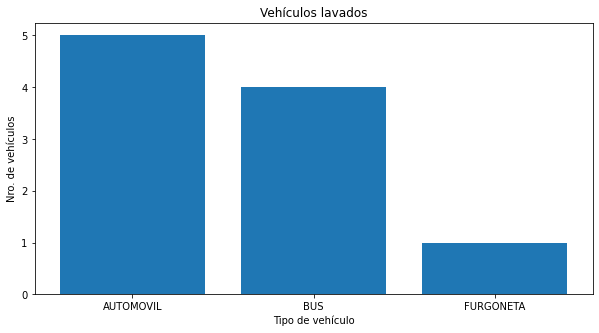

In [3]:
# Primer simulación con 3 máquina durante 60 minutos.
NUM_MAQUINAS = 3
TIEMPO_SIMULACION = 60
resultados_simulacion.clear()
print(colored(f'Simulación Iniciada! \n', 'green', attrs=['bold']))
# Creamos el entorno de simulacion
env = simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS))
# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)
print(colored('\nSimulación completada!', 'red', attrs=['bold']))

# Reporte
generar_reporte(resultados_simulacion, 'Simulación con 3 máquinas')

### Simulación con 4 máquinas

Simulación Iniciada! 

AUTOMOVIL con placa VGS753 llega a la lavanderia en el minuto 1.00.
AUTOMOVIL con placa VGS753 comienza el recorrido hasta la máquina en el minuto 1.00.
AUTOMOVIL con placa YLE674 llega a la lavanderia en el minuto 2.00.
AUTOMOVIL con placa VGS753 llega a la máquina de lavado en el minuto 2.00.
AUTOMOVIL con placa YLE674 comienza el recorrido hasta la máquina en el minuto 2.00.
FURGONETA con placa VJZ157 llega a la lavanderia en el minuto 3.00.
AUTOMOVIL con placa YLE674 llega a la máquina de lavado en el minuto 3.00.
FURGONETA con placa VJZ157 comienza el recorrido hasta la máquina en el minuto 3.00.
AUTOMOVIL con placa TKX541 llega a la lavanderia en el minuto 4.00.
AUTOMOVIL con placa TKX541 comienza el recorrido hasta la máquina en el minuto 4.00.
FURGONETA con placa VJZ157 llega a la máquina de lavado en el minuto 5.00.
BUS con placa KGT603 llega a la lavanderia en el minuto 5.00.
AUTOMOVIL con placa TKX541 llega a la máquina de lavado en el minuto 5.00.
BUS

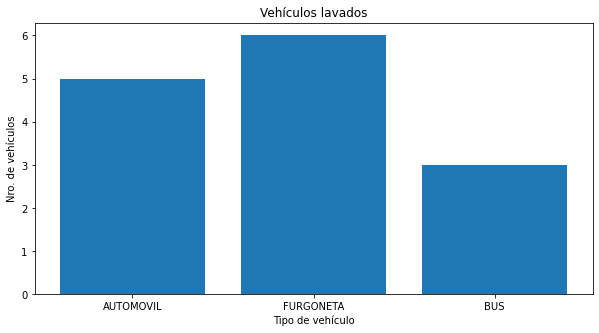

In [4]:
# Primer simulación con 4 máquina durante 60 minutos.
NUM_MAQUINAS = 4
TIEMPO_SIMULACION = 60
resultados_simulacion.clear()
print(colored(f'Simulación Iniciada! \n', 'green', attrs=['bold']))
# Creamos el entorno de simulacion
env = simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS))
# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)
print(colored('\nSimulación completada!', 'red', attrs=['bold']))

# Reporte
generar_reporte(resultados_simulacion, 'Simulación con 3 máquinas')